# Numerical data

### 1) Arbitary values imputation

In [1]:
import numpy as np
import pandas as pd

In [5]:
df= pd.read_csv('updated_mobile_info.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         586 non-null    int64  
 1   name               586 non-null    object 
 2   ratings            580 non-null    float64
 3   number of rating   586 non-null    float64
 4   number of reviews  586 non-null    float64
 5   ram                582 non-null    float64
 6   rom                559 non-null    float64
 7   expandable         331 non-null    float64
 8   display            585 non-null    float64
 9   camera             586 non-null    float64
 10  battery            565 non-null    float64
 11  price              586 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 55.1+ KB


In [11]:
df.isnull().sum()

Unnamed: 0             0
name                   0
ratings                6
number of rating       0
number of reviews      0
ram                    4
rom                   27
expandable           255
display                1
camera                 0
battery               21
price                  0
dtype: int64

In [12]:
# manually
df['battery']=df['battery'].fillna(55555555)

In [13]:
df['battery'].isnull().sum()

0

In [15]:
df.isnull().sum()

Unnamed: 0             0
name                   0
ratings                6
number of rating       0
number of reviews      0
ram                    4
rom                   27
expandable           255
display                1
camera                 0
battery                0
price                  0
dtype: int64

In [16]:
# using sklearn
from sklearn.impute import SimpleImputer
impute = SimpleImputer(strategy='constant',fill_value=45)

In [18]:
from sklearn.compose import ColumnTransformer
trf = ColumnTransformer(transformers=[
    ('n1',impute,['rom'])
],remainder='passthrough')

In [20]:
trf_df = trf.fit_transform(df)

In [21]:
trf.named_transformers_['n1'].statistics_

array([45.])

### 2) CCA

In [22]:
df.isnull().sum()

Unnamed: 0             0
name                   0
ratings                6
number of rating       0
number of reviews      0
ram                    4
rom                   27
expandable           255
display                1
camera                 0
battery                0
price                  0
dtype: int64

In [23]:
df.dropna(inplace=True)

In [24]:
df.isnull().sum()

Unnamed: 0           0
name                 0
ratings              0
number of rating     0
number of reviews    0
ram                  0
rom                  0
expandable           0
display              0
camera               0
battery              0
price                0
dtype: int64

In [25]:
df.shape

(324, 12)

### 3) Most frequent value imputer 

In [28]:
impute = SimpleImputer(strategy='most_frequent')
data = pd.read_csv('updated_mobile_info.csv')

In [29]:
data.isnull().sum()

Unnamed: 0             0
name                   0
ratings                6
number of rating       0
number of reviews      0
ram                    4
rom                   27
expandable           255
display                1
camera                 0
battery               21
price                  0
dtype: int64

In [30]:
data = impute.fit_transform(data)

In [32]:
demo = pd.DataFrame(data)

In [33]:
demo.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
dtype: int64

In [34]:
demo.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0,Cellecor E3,3.7,56.0,2.0,32.0,32.0,32.0,1.8,0.8,1000.0,1061.0
1,1,"REDMI 10 (Caribbean Green, 64 GB)",4.3,222897.0,13810.0,4.0,64.0,1.0,6.7,50.0,6000.0,9499.0
2,2,"REDMI 10 (Midnight Black, 64 GB)",4.3,222897.0,13810.0,4.0,64.0,1.0,6.7,50.0,6000.0,9499.0
3,3,"MOTOROLA G32 (Satin Silver, 128 GB)",4.1,9683.0,799.0,8.0,128.0,1.0,6.55,50.0,5000.0,11999.0
4,4,"realme C33 2023 (Night Sea, 64 GB)",4.5,6542.0,184.0,4.0,64.0,1.0,6.5,50.0,5000.0,9999.0


### 4)Imputing mean

In [37]:
data = pd.read_csv('updated_mobile_info.csv')

In [38]:
data.isnull().sum()

Unnamed: 0             0
name                   0
ratings                6
number of rating       0
number of reviews      0
ram                    4
rom                   27
expandable           255
display                1
camera                 0
battery               21
price                  0
dtype: int64

In [39]:
trf = ColumnTransformer(transformers=[
    ('n1',SimpleImputer(strategy='mean'),['ram']),
    ('n2',SimpleImputer(strategy='median'),['rom'])
],remainder='passthrough')

In [40]:
trf.set_output(transform='pandas')
trf_data = trf.fit_transform(data)

In [42]:
trf_data.isnull().sum()

n1__ram                           0
n2__rom                           0
remainder__Unnamed: 0             0
remainder__name                   0
remainder__ratings                6
remainder__number of rating       0
remainder__number of reviews      0
remainder__expandable           255
remainder__display                1
remainder__camera                 0
remainder__battery               21
remainder__price                  0
dtype: int64

In [43]:
trf_data['n1__ram'].mean() , data['ram'].mean()

(16.77250859106529, 16.772508591065293)

In [45]:
trf_data['n2__rom'].mean() , data['rom'].mean()

(82.01877133105802, 82.88908765652951)

# Categorical data 

In [48]:
data = pd.read_csv('Insurance_Company_Complaints__Resolutions__Status__and_Recoveries.csv')

In [49]:
data.isnull().sum()

Company            0
File No.           0
Opened             0
Closed           963
Coverage        2440
SubCoverage     8960
Reason          2617
SubReason       2617
Disposition    15288
Conclusion     17094
Recovery           0
Status             0
dtype: int64

In [50]:
data.head()

,Company,File No.,Opened,Closed,Coverage,SubCoverage,Reason,SubReason,Disposition,Conclusion,Recovery,Status
0,"Anthem Health Plans, Inc",7045593,05/31/2022,06/02/2022,Group,Health Only,Claim Handling,Medically Necessary,Company Position Substantiated,Company Position Upheld,0.00,Closed
1,"Anthem Health Plans, Inc",7043381,02/28/2022,06/02/2022,Group,Health Only,Claim Handling,Provider Contract Issue,Claim Settled,Satisfied,6467.30,Closed
2,"Anthem Health Plans, Inc",7044860,05/03/2022,06/02/2022,A & H,Health Only,Claim Handling,Denial,Claim Settled,Claim Paid,147.58,Closed
3,"Anthem Health Plans, Inc",7043381,02/28/2022,06/02/2022,Group,A & H,Claim Handling,Provider Contract Issue,Claim Settled,Satisfied,6467.30,Closed
4,"Anthem Health Plans, Inc",7052007,02/23/2023,03/17/2023,A & H,A & H,Marketing & Sales,Duplicate Coverage,Compromised Settlement/Resolution,Premium Refund,2179.32,Closed


<AxesSubplot: >

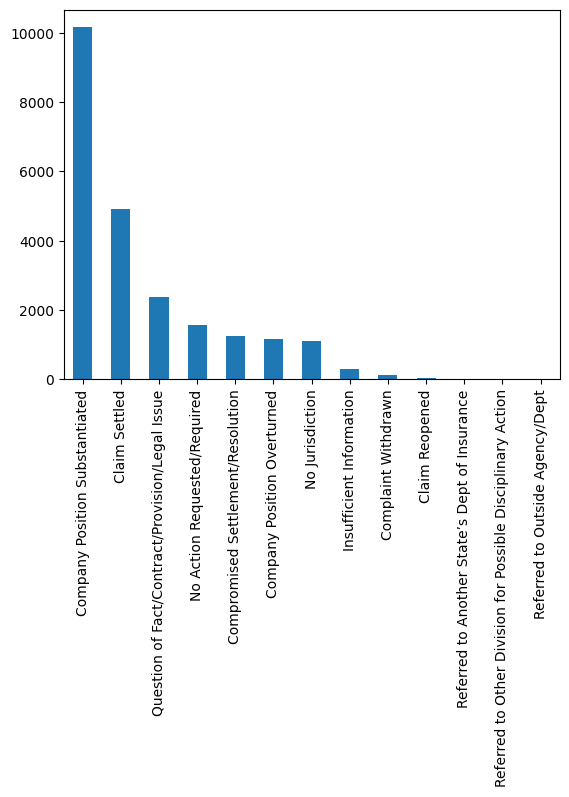

In [52]:
data['Disposition'].value_counts().sort_values(ascending=False).plot.bar()

In [51]:
from sklearn.impute import SimpleImputer

In [53]:
imput = SimpleImputer(strategy='constant',fill_value='Company Position Substantiated')
imput2 = SimpleImputer(strategy='constant',fill_value='Claim Paid')

In [54]:
trf = ColumnTransformer(transformers=[
    ('n1',imput,['Disposition']),
    ('n2',imput2,['Conclusion'])
],remainder='passthrough')

In [55]:
trf.set_output(transform='pandas')
df = trf.fit_transform(data)

In [56]:
df

,n1__Disposition,n2__Conclusion,remainder__Company,remainder__File No.,remainder__Opened,remainder__Closed,remainder__Coverage,remainder__SubCoverage,remainder__Reason,remainder__SubReason,remainder__Recovery,remainder__Status
0,Company Position Substantiated,Company Position Upheld,"Anthem Health Plans, Inc",7045593,05/31/2022,06/02/2022,Group,Health Only,Claim Handling,Medically Necessary,0.00,Closed
1,Claim Settled,Satisfied,"Anthem Health Plans, Inc",7043381,02/28/2022,06/02/2022,Group,Health Only,Claim Handling,Provider Contract Issue,6467.30,Closed
2,Claim Settled,Claim Paid,"Anthem Health Plans, Inc",7044860,05/03/2022,06/02/2022,A & H,Health Only,Claim Handling,Denial,147.58,Closed
3,Claim Settled,Satisfied,"Anthem Health Plans, Inc",7043381,02/28/2022,06/02/2022,Group,A & H,Claim Handling,Provider Contract Issue,6467.30,Closed
4,Compromised Settlement/Resolution,Premium Refund,"Anthem Health Plans, Inc",7052007,02/23/2023,03/17/2023,A & H,A & H,Marketing & Sales,Duplicate Coverage,2179.32,Closed
...,...,...,...,...,...,...,...,...,...,...,...,...
38262,Company Position Overturned,Corrective Action,New South Insurance Company,7006954,10/21/2021,12/17/2021,Individual Private Passenger,NaN,Claim Handling,Storage Fees,0.00,Closed
38263,Company Position Substantiated,Claim Paid,Liberty Insurance Corporation,7010204,02/19/2021,04/22/2021,Homeowners,Homeowners,Claim Handling,Claim Delay,0.00,Closed
38264,Claim Settled,Claim Paid,Farmers Group Property and Casualty Insurance ...,7015842,04/03/2018,04/25/2018,Individual Private Passenger,Medical Payments,Claim Handling,Claim Denial,191.51,Closed
38265,Question of Fact/Contract/Provision/Legal Issue,Claim Paid,Casco Indemnity Company,7005412,01/11/2021,01/28/2021,Extended Warranty & Service Contracts,NaN,Claim Handling,Unsatisfactory Settlement/Offer,0.00,Closed


In [58]:

df.isnull().sum()

n1__Disposition              0
n2__Conclusion               0
remainder__Company           0
remainder__File No.          0
remainder__Opened            0
remainder__Closed          963
remainder__Coverage       2440
remainder__SubCoverage    8960
remainder__Reason         2617
remainder__SubReason      2617
remainder__Recovery          0
remainder__Status            0
dtype: int64

# KNN Imputer

In [59]:
from sklearn.impute import KNNImputer

In [60]:
data = pd.read_csv('updated_mobile_info.csv')

In [128]:
impute = KNNImputer(n_neighbors=200,weights='distance')

In [129]:
trfdata = impute.fit_transform(data.drop('name',axis=1))

In [130]:
demo = pd.DataFrame(trfdata)

In [131]:
demo.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.0,3.7,56.0,2.0,32.0,32.0,32.000000,1.80,0.8,1000.0,1061.0
1,1.0,4.3,222897.0,13810.0,4.0,64.0,1.000000,6.70,50.0,6000.0,9499.0
2,2.0,4.3,222897.0,13810.0,4.0,64.0,1.000000,6.70,50.0,6000.0,9499.0
3,3.0,4.1,9683.0,799.0,8.0,128.0,131.275821,6.55,50.0,5000.0,11999.0
4,4.0,4.5,6542.0,184.0,4.0,64.0,1.000000,6.50,50.0,5000.0,9999.0


In [132]:
data.head()

,Unnamed: 0,name,ratings,number of rating,number of reviews,ram,rom,expandable,display,camera,battery,price
0,0,Cellecor E3,3.7,56.0,2.0,32.0,32.0,32.0,1.80,0.8,1000.0,1061.0
1,1,"REDMI 10 (Caribbean Green, 64 GB)",4.3,222897.0,13810.0,4.0,64.0,1.0,6.70,50.0,6000.0,9499.0
2,2,"REDMI 10 (Midnight Black, 64 GB)",4.3,222897.0,13810.0,4.0,64.0,1.0,6.70,50.0,6000.0,9499.0
3,3,"MOTOROLA G32 (Satin Silver, 128 GB)",4.1,9683.0,799.0,8.0,128.0,NaN,6.55,50.0,5000.0,11999.0
4,4,"realme C33 2023 (Night Sea, 64 GB)",4.5,6542.0,184.0,4.0,64.0,1.0,6.50,50.0,5000.0,9999.0


In [133]:
demo.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

In [134]:
data.isnull().sum()

Unnamed: 0             0
name                   0
ratings                6
number of rating       0
number of reviews      0
ram                    4
rom                   27
expandable           255
display                1
camera                 0
battery               21
price                  0
dtype: int64

In [135]:
data['expandable'].mean() , demo[6].mean()

(117.190332326284, 109.42625698671628)

In [136]:
demo[6]

0       32.000000
1        1.000000
2        1.000000
3      131.275821
4        1.000000
          ...    
581     53.521318
582    128.247816
583    256.000000
584     16.000000
585     32.000000
Name: 6, Length: 586, dtype: float64

In [137]:
data['expandable']

0       32.0
1        1.0
2        1.0
3        NaN
4        1.0
       ...  
581      NaN
582      NaN
583    256.0
584     16.0
585     32.0
Name: expandable, Length: 586, dtype: float64

SyntaxError: invalid syntax (552736407.py, line 1)